In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!ls "/content/drive/My Drive/Time_Series"

sample.csv  test.csv  train.csv


In [ ]:
def parse(x):
  return datetime.strptime(x, "%d-%m-%Y %H:%M")  

In [ ]:
train = pd.read_csv("/content/drive/My Drive/Time_Series/train.csv", parse_dates=['Datetime'], date_parser=parse)
test = pd.read_csv("/content/drive/My Drive/Time_Series/test.csv", parse_dates=['Datetime'], date_parser=parse)

In [ ]:
test_original = test.copy()
train_original = train.copy()

In [ ]:
def df_desc(df):
  print("Data Format:\n")
  print("Rows: ", df.shape[0])
  print("\n")
  print("Columns: ", df.shape[1])
  print("\n")
  print("\n")
  print("\n")
  print("Features: ", df.columns.to_list())
  print("\n")
  print("Information: ", df.info())
  print("\n")
  print("Description: ", df.describe())
  print("\n")
  print("\n")
  print("Missing Values: \n", df.isna().sum())
  print("\n")
  print("\n")
  print("Unique Values: \n", df.nunique())
  print("\n")
  print("Data Types: \n", df.dtypes)

In [ ]:
df_desc(train)

Data Format:

Rows:  18288


Columns:  3






Features:  ['ID', 'Datetime', 'Count']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB
Information:  None


Description:                   ID         Count
count  18288.000000  18288.000000
mean    9143.500000    138.958115
std     5279.435197    153.467461
min        0.000000      2.000000
25%     4571.750000     22.000000
50%     9143.500000     84.000000
75%    13715.250000    210.000000
max    18287.000000   1244.000000




Missing Values: 
 ID          0
Datetime    0
Count       0
dtype: int64




Unique Values: 
 ID          18288
Datetime    18288
Count         437
dtype: int64


Data Ty

In [ ]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')

In [ ]:
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')

In [ ]:
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [ ]:
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')

In [ ]:
# extract the year, month, day and hour from the Datetime column 
for i in (train, test, test_original, train_original):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['Hour'] = i.Datetime.dt.hour

In [ ]:
# Hypothesis: traffic pattern on weekend is higher than weekdays

# Extract the day of the week and then based on the value we will assign its type

train['day_of_week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']
# Assign 0: Weekday and 1: Weekend
def assign(row):
  if row.dayofweek == 5 or row.dayofweek == 6:
    return 1
  else:
    return 0
train.head()

,ID,Datetime,Count,year,month,day,Hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [ ]:
temp2 = train['Datetime'].apply(assign)
temp2

0        1
1        1
2        1
3        1
4        1
        ..
18283    0
18284    0
18285    0
18286    0
18287    0
Name: Datetime, Length: 18288, dtype: int64

In [ ]:
train['weekend'] = temp2
train.tail()

,ID,Datetime,Count,year,month,day,Hour,day_of_week,weekend
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0


In [ ]:
train.index = train.Datetime
df = train.drop('ID', 1)

In [ ]:
ts = df['Count']

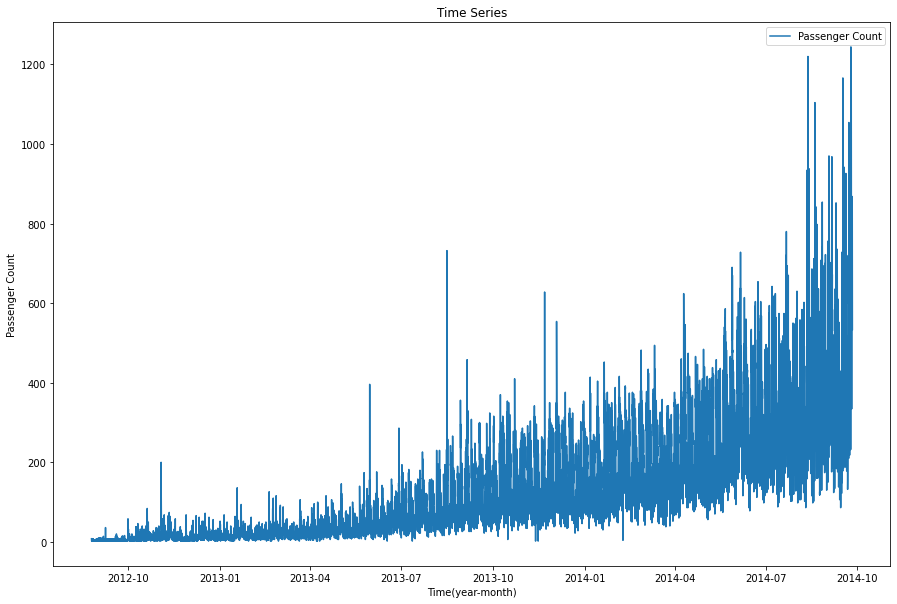

In [ ]:
# Passenger Count increased with time
plt.figure(figsize=(15,10))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend()

In [ ]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


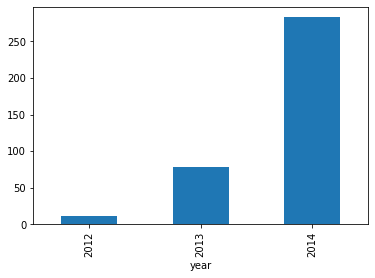

In [ ]:
# Traffic will increase with number of years
train.groupby('year')['Count'].mean().plot.bar()

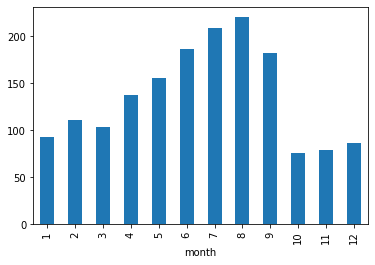

In [ ]:
# Traffic is higher in May to October
train.groupby('month')['Count'].mean().plot.bar()

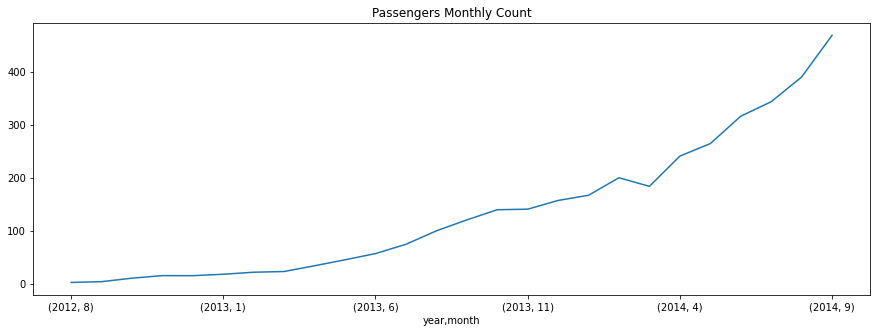

In [ ]:
# Oct, Nov and Dec are not present for year 2014
# Mean of these months in 2012 is too small
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title='Passengers Monthly Count')

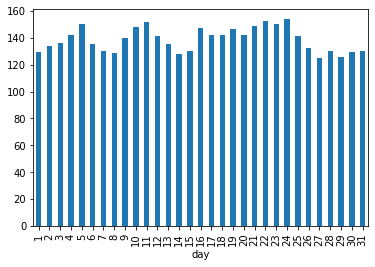

In [ ]:
train.groupby('day')['Count'].mean().plot.bar()

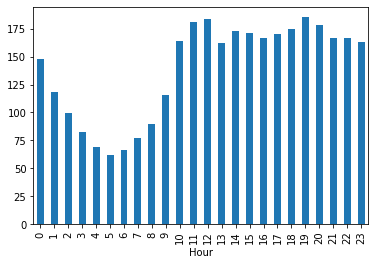

In [ ]:
# Peak hours start at 7PM and then decrease till 5 AM
# 11 AM onwards peak increases daily
train.groupby('Hour')['Count'].mean().plot.bar()

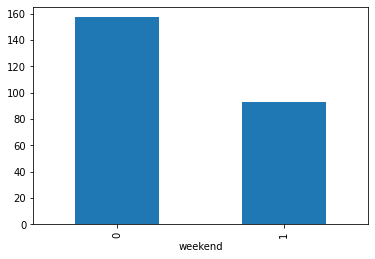

In [ ]:
# Weekdays have more traffic than Weekends
train.groupby('weekend')['Count'].mean().plot.bar()

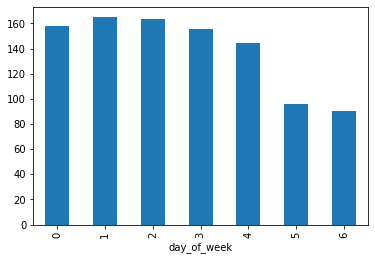

In [ ]:
# Weekend has lower traffic than Weekdays
train.groupby('day_of_week')['Count'].mean().plot.bar()

In [ ]:
train = train.drop('ID', 1)

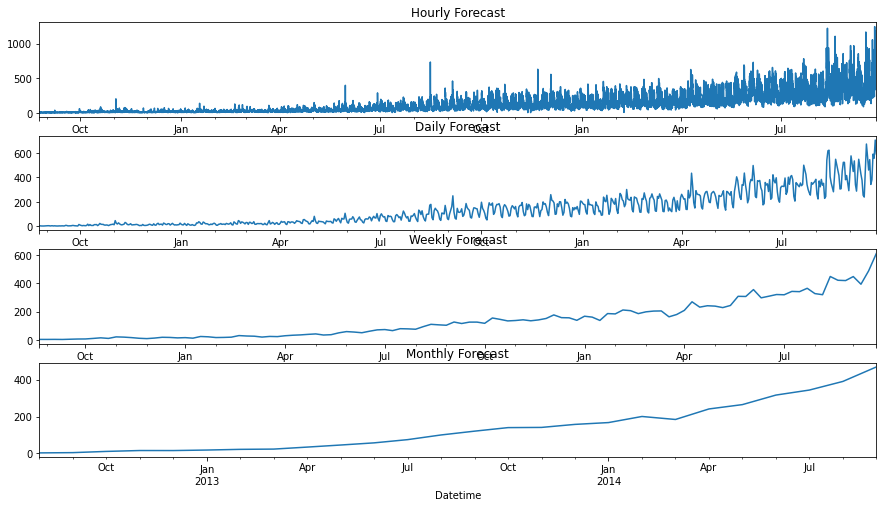

In [ ]:
# Reduce Noise by aggregating the time period
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
# Hourly Time Series
hourly = train.resample('H').mean()
# Convert to daily mean
daily = train.resample('D').mean()
# Convert to weekly mean
weekly = train.resample('W').mean()
# Convert to monthly mean
monthly = train.resample('M').mean()

fig, axs = plt.subplots(4, 1)
hourly.Count.plot(figsize=(15, 8), title='Hourly Forecast',
                  ax=axs[0])
daily.Count.plot(figsize=(15, 8), title='Daily Forecast',
                 ax=axs[1])
weekly.Count.plot(figsize=(15, 8), title='Weekly Forecast',
                  ax=axs[2])
monthly.Count.plot(figsize=(15, 8), title='Monthly Forecast',
                   ax=axs[3])
plt.show()

In [ ]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train = train.resample('D').mean()

In [ ]:
# Train Data: 7 Months
# Validation Data: 3 Months
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

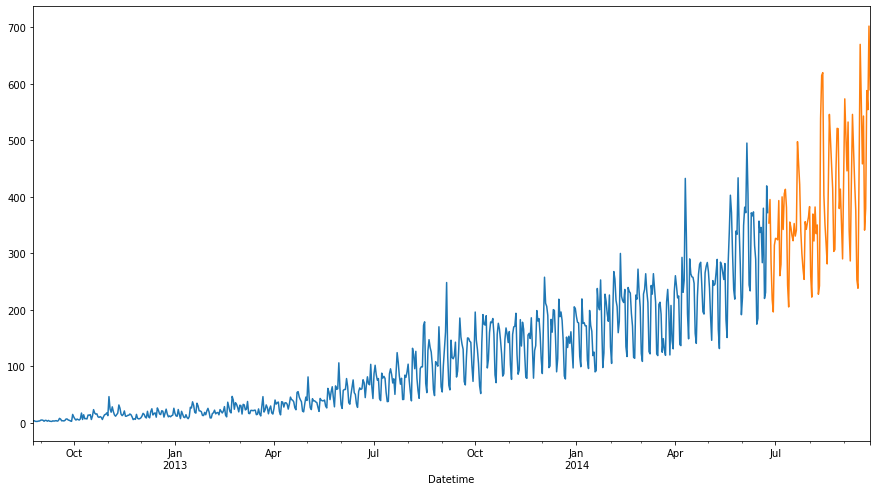

In [ ]:
Train.Count.plot(figsize=(15, 8), label='train')
valid.Count.plot(figsize=(15, 8), label='valid')
plt.show()

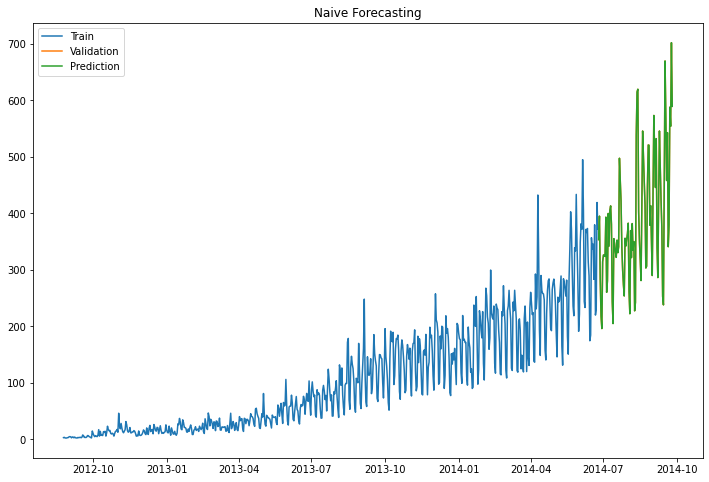

In [ ]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd) - 1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Validation')
plt.plot(y_hat.index, y_hat['Count'], label='Prediction')
plt.legend(loc='best')
plt.title('Naive Forecasting')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
rms

111.79050467496724

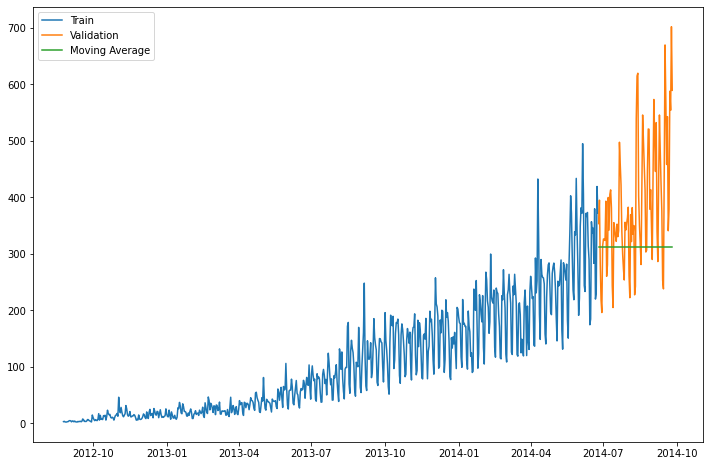

134.23733308950264


In [ ]:
y_hat_avg = valid.copy()
# Average of last 10 observations
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(12,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average')
plt.legend(loc='best')
plt.show()
print(sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)))

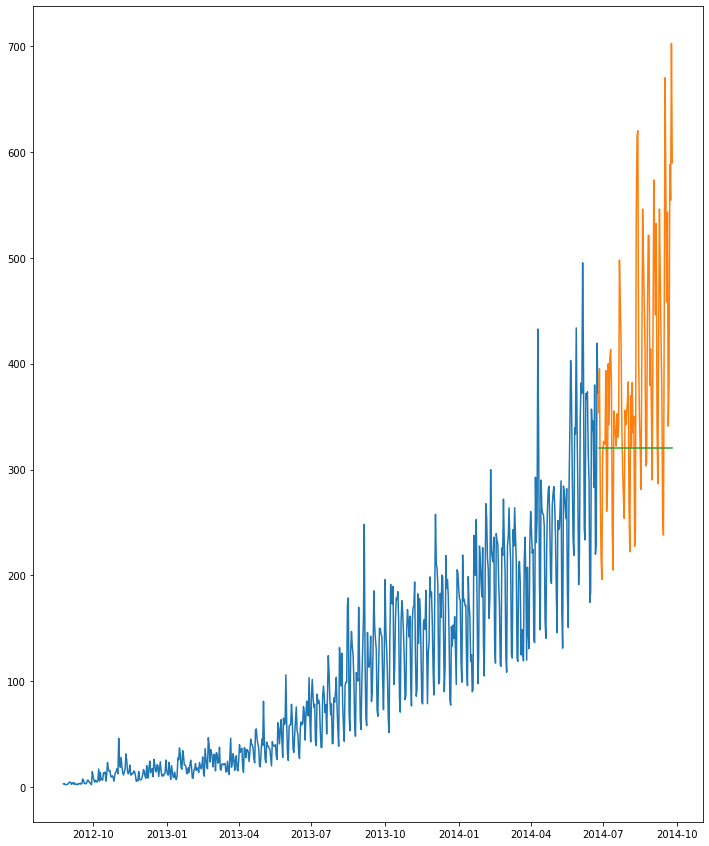

130.44984977550422


In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(window=20).mean().iloc[-1]
plt.figure(figsize=(12,15))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Prediction')
plt.show()
print(sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)))

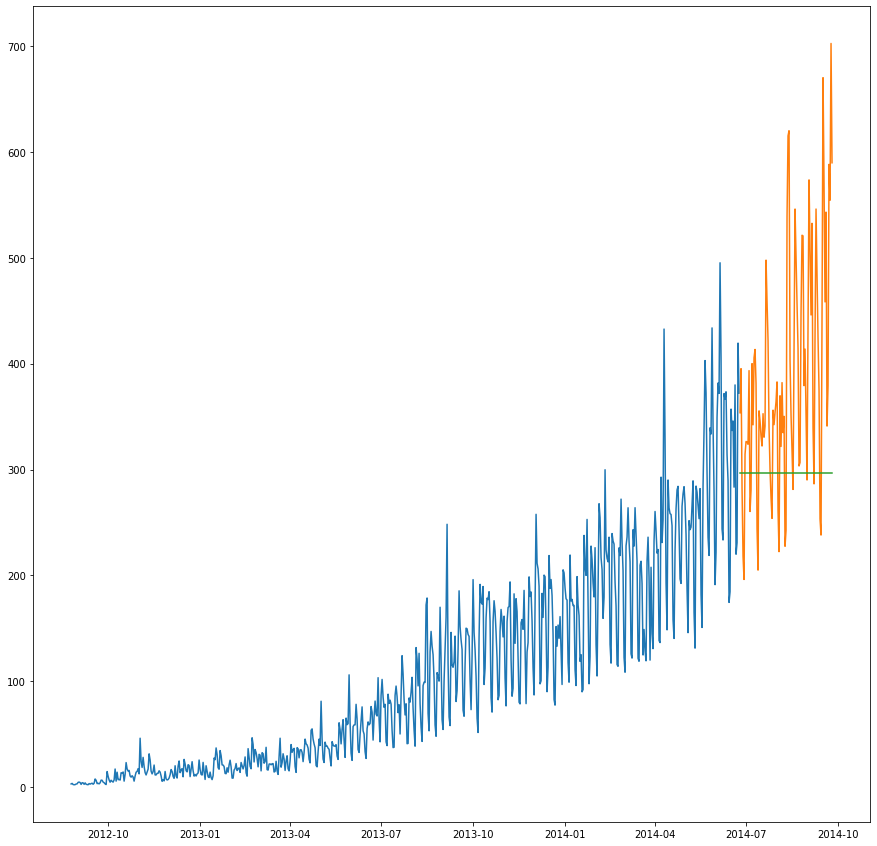

144.19175679986802


In [ ]:
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(window=50).mean().iloc[-1]
plt.figure(figsize=(15,15))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Prediction')
plt.show() 
print(sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)))

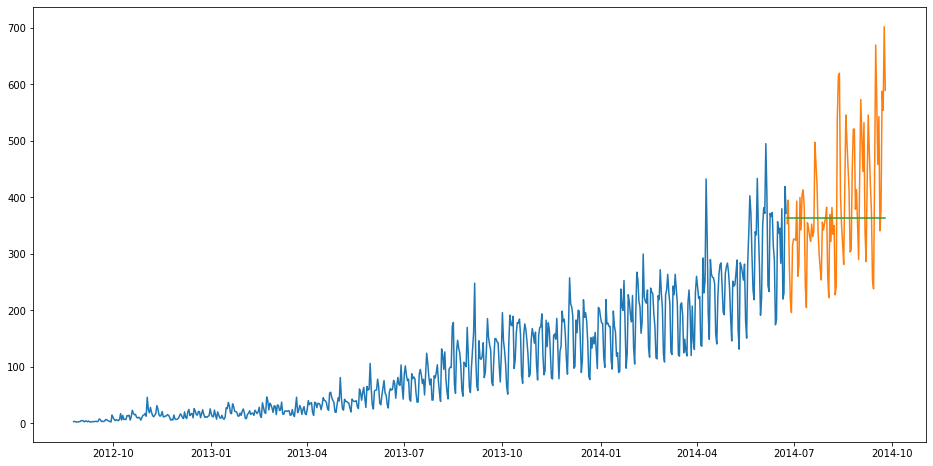

113.43708111884514


In [ ]:
# Simple Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, 
                                                          optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg['SES'], label='Forecasting using SES')
plt.show()
print(sqrt(mean_squared_error(valid.Count, y_hat_avg['SES'])))

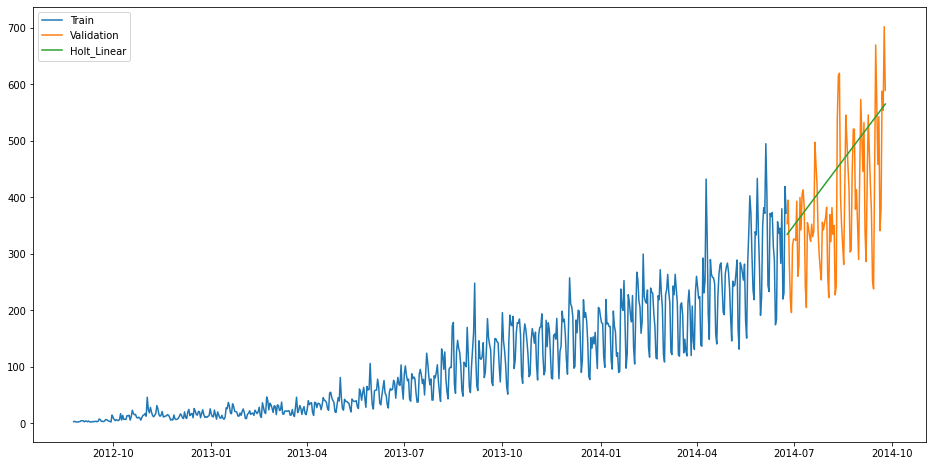

In [ ]:
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_Linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg['Holt_Linear'], label='Holt_Linear')
plt.legend(loc='best')
plt.show()

In [ ]:
print(sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Linear)))

112.94278345314041


In [ ]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [ ]:
train_original['ratio'] = (train_original['Count']/train_original['Count'].sum())
temp = train_original.groupby(['Hour'])['ratio'].sum()
pd.DataFrame(temp, columns=['Hour', 'ratio']).to_csv('GroupBy.csv')

In [ ]:
temp2 = pd.read_csv('GroupBy.csv')

In [ ]:
temp2.head()

,Hour,Hour.1,ratio
0,0,NaN,0.044287
1,1,NaN,0.035343
2,2,NaN,0.029911
3,3,NaN,0.024714
4,4,NaN,0.020802


In [ ]:
temp2 = temp2.drop('Hour.1', 1)

In [ ]:
merge = pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)
prediction = pd.merge(merge, temp2, on='Hour', how='left')

In [ ]:
prediction

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802
...,...,...,...,...,...,...
5107,23387.5,26.0,866.398583,23395,19,0.055627
5108,23387.5,26.0,866.398583,23396,20,0.053455
5109,23387.5,26.0,866.398583,23397,21,0.049895
5110,23387.5,26.0,866.398583,23398,22,0.050076


In [ ]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']

In [ ]:
submission = prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'Hour', 'ratio'], axis=1)
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt_Linear.csv')

In [ ]:
from google.colab import files
files.download("Holt_Linear.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

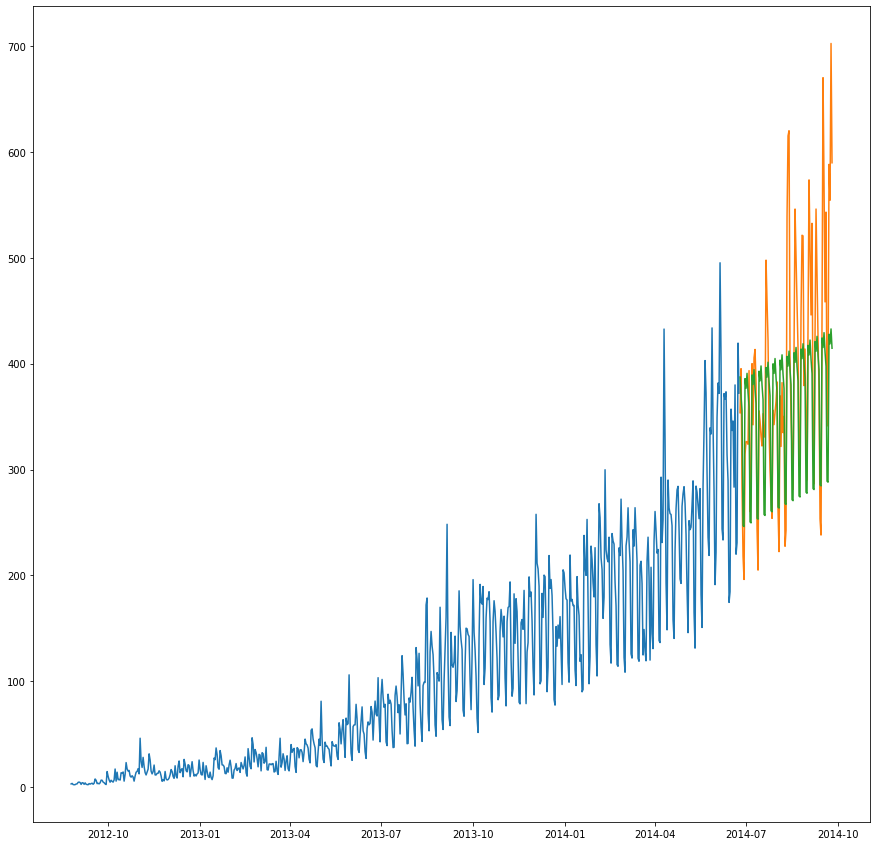

82.37571191747172


In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
fit3 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, 
                            seasonal='add', trend='add').fit()
y_hat_avg['ES'] = fit3.forecast(len(valid))
plt.figure(figsize=(15,15))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg['ES'], label='Holt Winter Model')
plt.show()
print(sqrt(mean_squared_error(valid['Count'], y_hat_avg['ES'])))

In [ ]:
predict = fit3.forecast(len(test))
test['prediction'] = predict

In [ ]:
merge = pd.merge(test, test_original, on=('day', 'month','year'), how='left')
merge.head()

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y
0,18299.5,2014.0,9.0,26.0,11.5,387.359995,18288,2014-09-26 00:00:00,0
1,18299.5,2014.0,9.0,26.0,11.5,387.359995,18289,2014-09-26 01:00:00,1
2,18299.5,2014.0,9.0,26.0,11.5,387.359995,18290,2014-09-26 02:00:00,2
3,18299.5,2014.0,9.0,26.0,11.5,387.359995,18291,2014-09-26 03:00:00,3
4,18299.5,2014.0,9.0,26.0,11.5,387.359995,18292,2014-09-26 04:00:00,4


In [ ]:
merge['Hour'] = merge['Hour_y']

In [ ]:
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)

In [ ]:
prediction = pd.merge(merge, temp2, on='Hour', how='left')

In [ ]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24

In [ ]:
prediction['ID'] = prediction['ID_y']

In [ ]:
submission = prediction.drop(['day', 'Hour', 'ratio', 'prediction',
                              'ID_x', 'ID_y'], axis=1)

In [ ]:
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt_Winter.csv', index_label=False)

In [ ]:
from google.colab import files
files.download('Holt_Winter.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

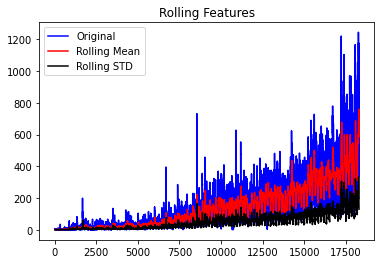

Results of Dickey-Fuller Test: 
Test Statistics             -4.456561
p-value                      0.000235
#Lag used                   45.000000
Number of obsns          18242.000000
Critical Value (1%)         -3.430709
Critical Value (5%)         -2.861698
Critical Value (10%)        -2.566854
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def stationary(timeseries):
  # For 1 day = 24 hours
  roll_mean = timeseries.rolling(window=24).mean()
  roll_std = timeseries.rolling(window=24).std()
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
  std = plt.plot(roll_std, color='black', label='Rolling STD')
  plt.legend(loc='best')
  plt.title('Rolling Features')
  plt.show(block=False)
  print("Results of Dickey-Fuller Test: ")
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', 
                                           '#Lag used', 'Number of obsns'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s) '%key] = value
  print(dfoutput)
stationary(train_original['Count'])

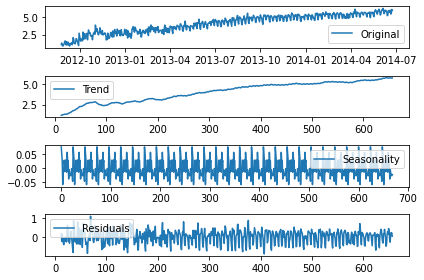

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

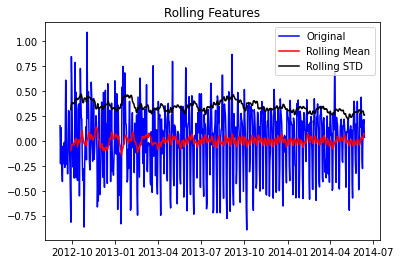

Results of Dickey-Fuller Test: 
Test Statistics         -7.822096e+00
p-value                  6.628321e-12
#Lag used                2.000000e+01
Number of obsns          6.240000e+02
Critical Value (1%)     -3.440873e+00
Critical Value (5%)     -2.866183e+00
Critical Value (10%)    -2.569243e+00
dtype: float64


In [ ]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace=True)
train_log_decompose.dropna(inplace=True)
stationary(train_log_decompose[0])

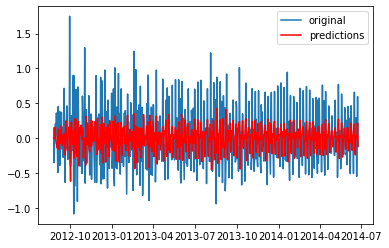

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2,1,0))
train_log_diff = Train_log - Train_log.shift(1)
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()